<a href="https://colab.research.google.com/github/Mervvick/AI_Autoencoder_Tasks/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B0_(Autoencoder)_%7C_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%BD%D0%B8%D0%BA_%7C_%D0%A3%D0%98%D0%98_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [ ]:
# Необходимые слои
from tensorflow.keras.layers import Dense, Conv2D, Input, Conv2DTranspose, Flatten, Reshape

# Для создания моделей через Functional API
from tensorflow.keras.models import Model

# Для вывода схем моделей
from tensorflow.keras.utils import plot_model

## Утилита

Проверка, автокодировщик ли мы создали. Для этого вход и выход должны совпадать по форме (первую ось, ось батчей, не сравниваем).

In [ ]:
def model_check(model):
  # Входная форма
  input_shape = model.input.get_shape()[1:]

  # Выходная форма
  output_shape = model.output.get_shape()[1:]

  # Сравнение
  assert input_shape == output_shape, 'Вход и выход не совпадают по форме'

## Задача 1


Создайте 3 модели: енкодер, декодер и автокодировщик из них.

#### Архитектура энкодера
1. Создайте входной слой и присвойте его переменной `encoder_inputs`;
2. Достаньте форму входного слоя и присвойте переменной `pre_flat_shape`;
3. Разверните тензор слоем `Flatten`;
4. Присвойте переменной `flat_shape` форму тензора;
5. Задайте линейный слой с числом нейронов `LATENT_DIM` и присвойте `encoder_outputs`;

#### Архитектура декодера
6. Создайте входной слой и присвойте его `decoder_inputs`;
7. Задайте линейный слой с `flat_shape` нейронами и присвойте `decoder_outputs`;

#### Сборка моделей
8. Создайте модель энкодера `Model` с аргументами `encoder_inputs` и `encoder_outputs` и присвойте переменной `encoder`;
9. Создайте модель декодера `Model` с аргументами `decoder_inputs` и `decoder_outputs` и присвойте переменной `decoder`;
10. Создайте модель автокодировщика `Model` с первым аргументами `encoder_inputs` и `decoder(encoder(encoder_inputs))`.


In [15]:
SHAPE = 28, 28, 1

# размер скрытого пространства
LATENT_DIM = 2

# ЭНКОДЕР
# Место для энкодера
encoder_inputs = Input(SHAPE)
pre_flat_shape = encoder_inputs.shape[1:]
x = Flatten()(encoder_inputs)
flat_shape = x.shape[1]
encoder_outputs = Dense(LATENT_DIM)(x)

# ДЕКОДЕР
# Место для декодера
decoder_inputs = Input(LATENT_DIM)
decoder_outputs = Reshape(pre_flat_shape)(Dense(flat_shape)(decoder_inputs))


encoder = Model(encoder_inputs, encoder_outputs)
decoder = Model(decoder_inputs, decoder_outputs)
autoencoder = Model(encoder_inputs, decoder(encoder(encoder_inputs)))
autoencoder.compile()
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 model_9 (Functional)        (None, 2)                 1570      
                                                                 
 model_10 (Functional)       (None, 28, 28, 1)         2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_check(autoencoder)

### Решение

In [ ]:
SHAPE = 28, 28, 1

# размер скрытого пространства
LATENT_DIM = 2

# ЭНКОДЕР
# ----------------------------------------
encoder_inputs = Input(SHAPE)
pre_flat_shape = encoder_inputs.shape[1:]
x = Flatten()(encoder_inputs)
flat_shape = x.shape[1]
encoder_outputs = Dense(LATENT_DIM)(x)
# ----------------------------------------

# ДЕКОДЕР
# ----------------------------------------
# для энкодера необходим свой входной слой
decoder_inputs = Input(LATENT_DIM)
x = Dense(flat_shape)(decoder_inputs)
decoder_outputs = Reshape(pre_flat_shape)(x)
# ----------------------------------------

# создание энкодера
encoder = Model(inputs=encoder_inputs, outputs=encoder_outputs)

# создание декодера
decoder = Model(inputs=decoder_inputs, outputs=decoder_outputs)

# создание автокодировщика из енкодера и декодера
autoencoder = Model(inputs=encoder_inputs, outputs=decoder(encoder(encoder_inputs)))

autoencoder.compile()
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 2)                 1570      
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_check(autoencoder)

## Задача 2

Теперь постройте автокодировщик по блок-схеме:

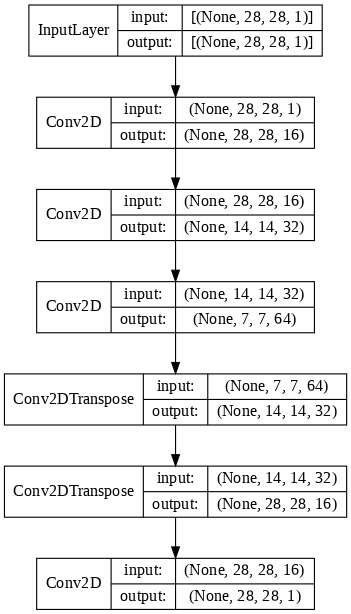

**Размеры всех ядер: (3, 3). Bias по умолчанию.**

Если все получится правильно, то модель пройдет проверку в конце.

In [21]:
# Место для модели
inputs = Input(SHAPE)
x = Conv2D(16, (3, 3), padding = 'same')(inputs)
x = Conv2D(32, (3, 3), strides = 2, padding = 'same')(x)
x = Conv2D(64, (3, 3), strides = 2, padding = 'same')(x)
x = Conv2DTranspose(32, (3, 3), strides = 2, padding = 'same')(x)
x = Conv2DTranspose(16, (3, 3), strides = 2, padding = 'same')(x)
outputs = Conv2D(1, (3, 3), padding = 'same')(x)

model = Model(inputs, outputs)

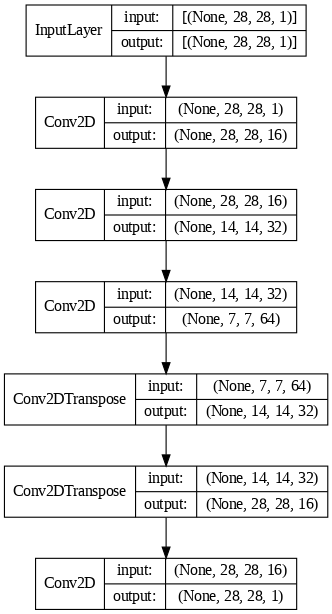

In [22]:
# вывод схемы
plot_model(model, show_shapes=True, show_layer_names=False, dpi=80)

In [23]:
# проверка на совпадение входов и выходов
model_check(model)

In [24]:
# если получилась нужная модель, то ошибка не появится
assert model.count_params() == 46529

### Решение

Теперь постройте автокодировщик по блок-схеме:

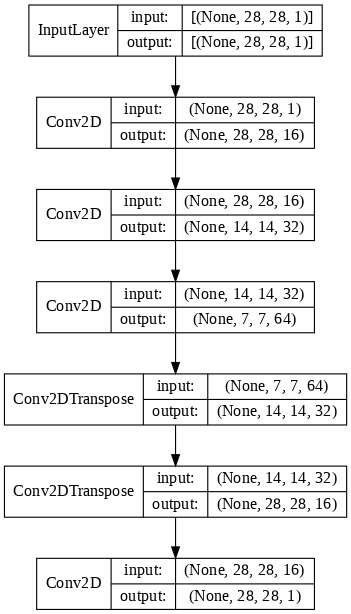

**Размеры всех ядер: (3, 3). Bias по умолчанию.**

Если все получится правильно, то модель пройдет проверку в конце.

In [ ]:
SHAPE = 28, 28, 1

inputs = Input(SHAPE)
x = Conv2D(16, 3, padding='same')(inputs)
x = Conv2D(32, 3, padding='same', strides=2)(x)
x = Conv2D(64, 3, padding='same', strides=2)(x)

x = Conv2DTranspose(32, 3, padding='same', strides=2)(x)
x = Conv2DTranspose(16, 3, padding='same', strides=2)(x)
outputs = Conv2D(1, 3, padding='same')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 1)         145 

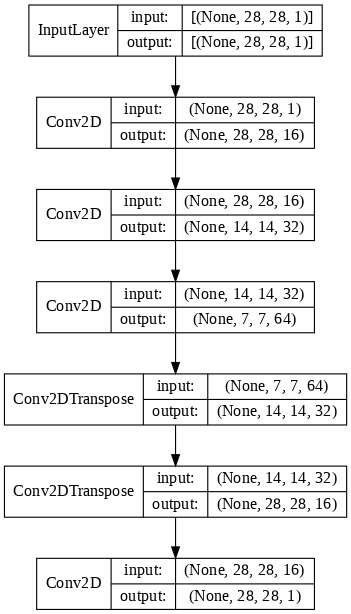

In [ ]:
# вывод схемы
plot_model(model, show_shapes=True, show_layer_names=False, dpi=80)

In [ ]:
# проверка на совпадение входов и выходов
model_check(model)

In [ ]:
# если получилась нужная модель, то ошибка не появится
assert model.count_params() == 46529